In [1771]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1772]:
df = pd.read_csv('../../../../Datasets/home-data-for-ml-course/train.csv')

In [1773]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1774]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Missing Value Treatment

In [1775]:
null_count = {}
for each in df.columns:
    null_count_each = df[each].isnull().sum()
    if null_count_each != 0:
        null_count[each] = [null_count_each, round((null_count_each/len(df.index))*100,2)]

In [1777]:
null_count_df

,Nulls,% Nulls
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
MasVnrType,872.0,59.73
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageType,81.0,5.55
GarageYrBlt,81.0,5.55
GarageFinish,81.0,5.55


### PoolQC and MiscFeature

PoolQC (quality of pool) is 99.52% Null. --> We are dropping this.

MiscFeature is 96.3% missing --> We are dropping this.

In [1778]:
df.drop(columns=['PoolQC', 'MiscFeature'], inplace=True)

## Alley 

There are 50 houses with Gravel and 41 with pave.

Let fill the nans with "No Alley"

In [1779]:
df['Alley'].value_counts(dropna=False)

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

In [1780]:
df.loc[:, 'Alley'] = df.loc[:,'Alley'].fillna("No Alley")

In [1781]:
df['Alley'].value_counts()

Alley
No Alley    1369
Grvl          50
Pave          41
Name: count, dtype: int64

## Fence Quality

Let impute the nans with "No Fence"

In [1782]:
df['Fence'].value_counts(dropna=False)

Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [1783]:
df.loc[:,'Fence'] = df.loc[:,'Fence'].fillna("No Fence")

In [1784]:
df['Fence'].value_counts()

Fence
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: count, dtype: int64

## MasVnrType

MasVnrType: Masonry veneer type

there also is a related column

MasVnrArea: Masonry veneer area in square feet

In [1785]:
df['MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [1786]:
df['MasVnrArea'].isnull().sum()
# this has just 8 missing values

8

In [1787]:
# Look the value count for MasVnrArea col for MasVnrType is NaN
df[df['MasVnrType'].isna()]['MasVnrArea'].value_counts()

MasVnrArea
0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: count, dtype: int64

Looks like for most of the nans in "MasVnrType" the area is 0 or 1. We will replace the MasVnrType col with "No Vnr".

In [1788]:
## replacing Vnr Type with MasVnrArea 0, with No Vnr
df.loc[df['MasVnrArea'] == 0.0, 'MasVnrType'] = df.loc[df['MasVnrArea'] == 0.0, 'MasVnrType'].fillna('No Vnr')

In [1789]:
## replacing Vnr Type with MasVnrArea 1, with No Vnr
df.loc[df['MasVnrArea'] == 1.0, 'MasVnrType'] = df.loc[df['MasVnrArea'] == 1.0, 'MasVnrType'].fillna('No Vnr')

In [1790]:
df[['MasVnrType']].value_counts(dropna=False)

MasVnrType
No Vnr        861
BrkFace       445
Stone         128
BrkCmn         15
NaN            11
Name: count, dtype: int64

**We still have 11 NaNs to deal with. Lets look at MasVnrArea col for more insight**

### MasVnrArea

In [1791]:
df[df['MasVnrArea'].isna()]['MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

For all MasVnrArea NaNs, MasVnrType is also NaN suggesting that No Vnr.   

Lets impute MasVnrArea with 0 and MasVnrType with No Vnr

In [1792]:
df.loc[df['MasVnrArea'].isna(), 'MasVnrType'] = df.loc[df['MasVnrArea'].isna(), 'MasVnrType'].fillna('No Vnr')

df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [1793]:
df['MasVnrArea'].isna().sum()

0

In [1794]:
df['MasVnrType'].value_counts(dropna=False)

MasVnrType
No Vnr     869
BrkFace    445
Stone      128
BrkCmn      15
NaN          3
Name: count, dtype: int64

We still have 3 NaNs to deal with.

In [1795]:
df[df['MasVnrType'].isna()]['MasVnrArea']

624     288.0
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64

In [1796]:
df[(df['MasVnrArea'] > 250) & (df['MasVnrArea'] < 350)]['MasVnrType'].value_counts()

MasVnrType
BrkFace    76
Stone      24
BrkCmn      2
Name: count, dtype: int64

In [1797]:
df['MasVnrType'] = df['MasVnrType'].fillna('BrkFace')

In [1798]:
df['MasVnrType'].value_counts()

MasVnrType
No Vnr     869
BrkFace    448
Stone      128
BrkCmn      15
Name: count, dtype: int64

## FireplaceQu

Looks like this column alos has a related column

Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality

In [1799]:
df['FireplaceQu'].value_counts(dropna=False)

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

In [1800]:
df.loc[df['FireplaceQu'].isna(), ['Fireplaces']].value_counts(dropna=False)

Fireplaces
0             690
Name: count, dtype: int64

In [1801]:
df['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

We can confirm that, all the nans in FireplaceQu column is from the houses with no fire places. Lets fix that.

In [1802]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No')

In [1803]:
df['FireplaceQu'].value_counts(dropna=False)

FireplaceQu
No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

## LotFrontage 

LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet

**Need to further look into this. Might have to use regression to impute these values later**


In [1804]:
df['LotFrontage'].value_counts(dropna=False)

LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: count, Length: 111, dtype: int64

In [1805]:
df[df['LotArea'].isna()]['LotArea']

Series([], Name: LotArea, dtype: int64)

For now, let us impute this with the median and see how the prediction looks like.

In [1806]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median)

In [1807]:
df['LotFrontage'].isna().sum()

0

## Garage

GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality   
GarageCond: Garage condition  

In [1808]:
df.loc[df['GarageType'].isna(), 'GarageYrBlt'].value_counts(dropna=False)

GarageYrBlt
NaN    81
Name: count, dtype: int64

In [1809]:
df.loc[df['GarageType'].isna(), 'GarageFinish'].value_counts(dropna=False)

GarageFinish
NaN    81
Name: count, dtype: int64

In [1810]:
df.loc[df['GarageType'].isna(), 'GarageQual'].value_counts(dropna=False)

GarageQual
NaN    81
Name: count, dtype: int64

In [1811]:
df.loc[df['GarageType'].isna(), 'GarageCond'].value_counts(dropna=False)

GarageCond
NaN    81
Name: count, dtype: int64

We can see that, the data missing is because the house doesnot have a garage.

In [1812]:
df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NO')

In [1813]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('0000')

## Basement

BsmtQual: Height of the basement    
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  


missing:

BsmtFinType2	38.0	2.60  
BsmtExposure	38.0	2.60  
BsmtFinType1	37.0	2.53  
BsmtCond	37.0	2.53  
BsmtQual	37.0	2.53  


If we look into other numerical conditions for the missing values, these numerical columns have 0 in them. suggesting that the basement is missing. Therefore we are filling these with 0.

`df[df['BsmtCond'].isna()]['TotalBsmtSF']`

In [1814]:
# the decription says, if present. therefore the missing mean not present
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No')

In [1815]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')

In [1816]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')

In [1817]:
df['BsmtCond'] = df['BsmtCond'].fillna('No')

In [1818]:
df['BsmtQual'] = df['BsmtQual'].fillna('No') 

## Electrical

In [1819]:
df['Electrical'].value_counts(dropna=False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

In [1820]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [1821]:
df['Electrical'].value_counts(dropna=False)

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

## Final Check

In [1822]:
null_count = {}
for each in df.columns:
    null_count_each = df[each].isnull().sum()
    if null_count_each != 0:
        null_count[each] = [null_count_each, round((null_count_each/len(df.index))*100,2)]

In [1823]:
null_count

{}

No more missing values. Let us move forward and look into the correlation matrix.

In [1824]:
df.to_csv("./cleaned_housing_data")

In [1825]:
df = pd.read_csv('./cleaned_housing_data', index_col='Id')

In [1826]:
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,2008,WD,Normal,208500
2,1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Vnr,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,2007,WD,Normal,181500
3,2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,2008,WD,Normal,223500
4,3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Vnr,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
5,4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1455,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,No Vnr,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Fence,0,8,2007,WD,Normal,175000
1457,1456,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1458,1457,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,No Vnr,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500


In [1827]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# EDA

In [1828]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Correlation Matrix

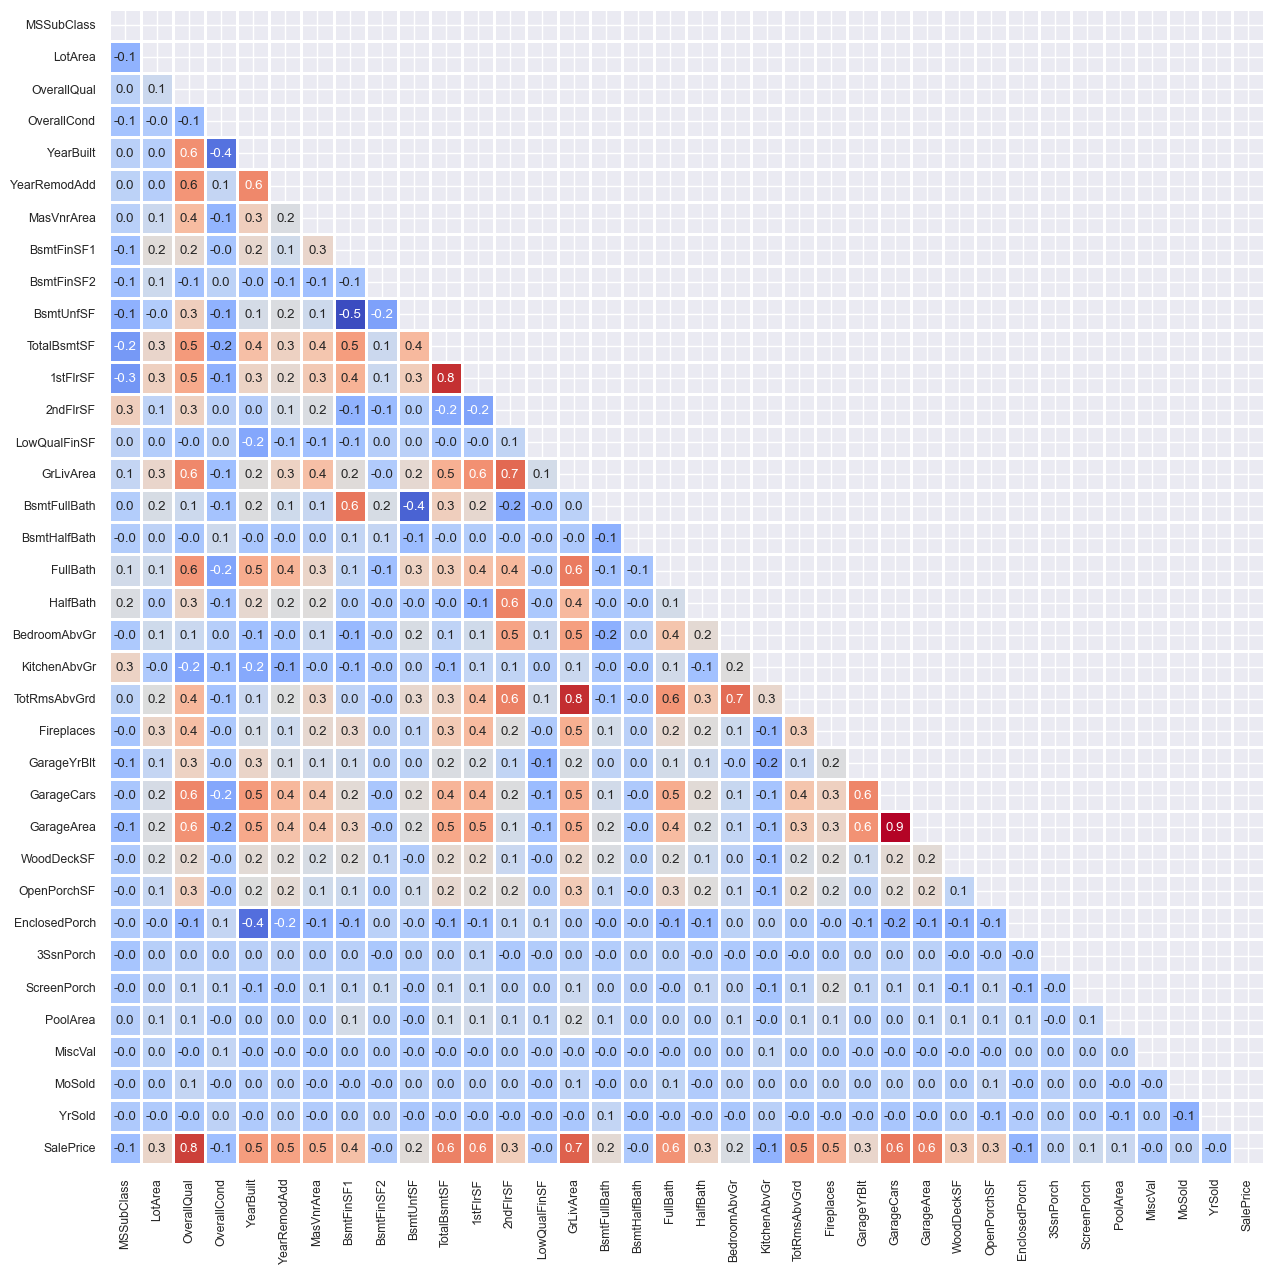

In [1829]:
sns.set(font_scale=0.8)
correlation_df = df.select_dtypes(np.number).corr()
mask = np.triu(correlation_df.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_df,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            mask=mask,
            square=True,
            linewidths=1,
            cbar=False)

plt.show()

In [1830]:
## Dropping the zero or close to zero correlations 

In [1831]:
correlation_df['SalePrice']

MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.261366
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

# Feature Engineering

### 1. Merging multiple bathroom columns into 1.
Assign 0.5 weight to half bath

In [1832]:
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (df['BsmtHalfBath'] * 0.5)

In [1833]:
df.drop(columns=['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], inplace=True)

### 2. Merging multiple basementh columns

In [1834]:
# let us look at their individual correlation with the target
df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']].corrwith(df['SalePrice'])

BsmtFinSF1     0.386420
BsmtFinSF2    -0.011378
BsmtUnfSF      0.214479
TotalBsmtSF    0.613581
dtype: float64

In [1835]:
df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].corrwith(df['TotalBsmtSF'])

BsmtFinSF1    0.522396
BsmtFinSF2    0.104810
BsmtUnfSF     0.415360
dtype: float64

High correlation among these variable.  

We will now drop these variables and train our model. Later, we will keep them and see if there is any change in performance of the model

In [1836]:
# TotalBsmtSF is the sum of individual columns
df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace=True)

### 3. Add few new features from exitsting ones

In [1837]:
# total age of the house when it was sold
df['HouseAge'] = np.abs(df['YearBuilt'] - df['YrSold'])

In [1838]:
df['NewHouse'] = df['HouseAge'].apply(lambda x: 1 if x < 10 else 0)

In [1839]:
df['OldHouse'] = df['HouseAge'].apply(lambda x: 1 if x > 50 else 0)

In [1840]:
df['RemodeledAge'] = np.abs(df['YearBuilt'] - df['YearRemodAdd'])

In [1841]:
df['TotalSquareFootage'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

In [1842]:
df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

In [1843]:
df['TotalOutdoorSpace'] = df['TotalPorchArea'] + df['WoodDeckSF'] + df['PoolArea']

In [1844]:
df['PricePerSF'] = df['SalePrice']/df['TotalSquareFootage']

In [1845]:
df['CarsToGarageRatio'] = df['GarageCars']/df['GarageArea']

In [1846]:
df['QualityScore'] = df['OverallCond'] * df['OverallQual']

#### 3.1 Checking Correlation of newly added features with target variable

In [1847]:
df[['HouseAge', 'RemodeledAge', 'TotalSquareFootage', 'TotalPorchArea', 'PricePerSF', 'TotalOutdoorSpace', 'CarsToGarageRatio', 'QualityScore']].corrwith(df['SalePrice'])

HouseAge             -0.523350
RemodeledAge         -0.217503
TotalSquareFootage    0.782260
TotalPorchArea        0.195739
PricePerSF            0.640602
TotalOutdoorSpace     0.390365
CarsToGarageRatio    -0.034869
QualityScore          0.565294
dtype: float64

We can drop the CarsToGarageRatio as it has very low correlation with the target variable

In [1848]:
df.drop(columns=['CarsToGarageRatio'], inplace=True)

### 4. Adding binary flag columns

In [1849]:
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [1850]:
df['HasPorch'] = df['TotalPorchArea'].apply(lambda x: 1 if x > 0 else 0)

In [1851]:
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

In [1852]:
df['HasFirePlace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [1853]:
df[['TotalBathrooms',
       'HouseAge', 'RemodeledAge', 'TotalSquareFootage', 'TotalPorchArea',
       'PricePerSF', 'TotalOutdoorSpace', 'QualityScore', 'HasPool',
       'HasPorch', 'HasGarage', 'HasFirePlace',]].corrwith(df['SalePrice'])

TotalBathrooms        0.631731
HouseAge             -0.523350
RemodeledAge         -0.217503
TotalSquareFootage    0.782260
TotalPorchArea        0.195739
PricePerSF            0.640602
TotalOutdoorSpace     0.390365
QualityScore          0.565294
HasPool               0.093708
HasPorch              0.296678
HasGarage             0.236832
HasFirePlace          0.471908
dtype: float64

In [1854]:
df.drop(columns=['HasPool'], inplace=True)

### 5. Converting `MoSold` Column to Categorical Season

In [1855]:
df[['MoSold']].corrwith(df['SalePrice'])

MoSold    0.046432
dtype: float64

In [1856]:
def get_season_(month_number):
    if month_number in [1,2,12]:
        return "winter"
    elif month_number in [3,4,5]:
        return 'spring'
    elif month_number in [6,7,8]:
        return 'autumn'
    elif month_number in [9,10,11]:
        return 'summer'

In [1857]:
df['SeasonOfSale'] = df['MoSold'].apply(lambda x: get_season_(x)) 

In [1858]:
df.drop(columns=['MoSold'], inplace=True)

#### I think we are done with feature engineering the numerical columns

## Feature Engineering Categorical Columns

In [1859]:
df.select_dtypes(np.object_).columns

Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'SeasonOfSale'],
      dtype='object')

### 1. Converting Neighborhood to NeightborhoodMeidanPrices Numerical Column

In [1860]:
df['Neighborhood']

Id
1       CollgCr
2       Veenker
3       CollgCr
4       Crawfor
5       NoRidge
         ...   
1456    Gilbert
1457     NWAmes
1458    Crawfor
1459      NAmes
1460    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [1861]:
# getting median house prices in the neighbourhood
neighborhood_median_prices = df.groupby(by="Neighborhood")['SalePrice'].median().sort_values(ascending=False).to_dict()

In [1862]:
df['NeighborhoodMedianPrices'] = df['Neighborhood'].map(neighborhood_median_prices)

In [1863]:
df[['NeighborhoodMedianPrices']].corrwith(df['SalePrice'])

NeighborhoodMedianPrices    0.733515
dtype: float64

Highly Correlated to Sale Price target

### 2. Proximity To Road

In [1864]:
df['CloseProximityToRoad'] = df[['Condition1', 'Condition2']].apply(lambda x : x['Condition1'] in ['Artery', 'Feedr'] or x['Condition2'] in ['Artery', 'Feedr'], axis=1)

In [1865]:
df['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [1866]:
df[['CloseProximityToRoad']].corrwith(df['SalePrice'])

CloseProximityToRoad   -0.166585
dtype: float64

### 3. Converting ordinal Categories to numerical column


#### 3.1 LotShape

In [1867]:
df['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [1868]:
lot_shape_mapping = {
    'Reg':3,
    'IR3':2,
    'IR2':1,
    'IR1':0
}

In [1869]:
df['LotShapeScore'] = df['LotShape'].map(lot_shape_mapping)

#### 3.2 LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [1870]:
land_contor_map = {
    'Lvl': 3,
    'Bnk': 2,
    'HLS': 1,
    'Low': 0
}

In [1871]:
df['LandContourScore'] = df['LandContour'].map(land_contor_map)

#### 3.3 LandSlope

Gtl	Gentle slope  
Mod	Moderate Slope	  
Sev	Severe Slope  


In [1872]:
land_slope_map = {
    'Gtl':2,
    'Mod':1,
    'Sev':0 
}

In [1873]:
df['LandSlopeScore'] = df['LandSlope'].map(land_slope_map)

#### 3.4 ExterQual and ExterCond

ExterQual: Evaluates the quality of the material on the exterior 
ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [1874]:
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

df['ExternalQualityScore'] = df['ExterQual'].map(quality_mapping)
df['ExternalCondScore'] = df['ExterCond'].map(quality_mapping)


#### 3.5 BsmtQual and BsmtCond

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement


In [1875]:
df['BsmtCond'].value_counts(dropna=False)

BsmtCond
TA    1311
Gd      65
Fa      45
No      37
Po       2
Name: count, dtype: int64

In [1876]:
quality_mapping_basement = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'No':1}

In [1877]:
df['BsmtQaulityScore'] = df['BsmtQual'].map(quality_mapping_basement)
df['BsmtConditionScore'] = df['BsmtCond'].map(quality_mapping_basement)

#### 3.6 Rating of basement finished area

BsmtFinType1 and BsmtFinType2
  
BsmtFinType1: Rating of basement finished area

     

In [1878]:
df['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
No      37
Name: count, dtype: int64

In [1879]:
basement_mapping = {
    'GLQ': 7,
    'ALQ': 6,
    'BLQ': 5,
    'Rec': 4,
    'LwQ': 3,
    'Unf': 2,
    'No': 1
}

df['BsmtFinType1'] = df['BsmtFinType1'].map(basement_mapping) 
df['BsmtFinType2'] = df['BsmtFinType2'].map(basement_mapping)

#### 3.7 Remaining Columns 

In [1880]:
df['FireplaceQu'].value_counts()

FireplaceQu
No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [1881]:
hk_quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['HeatingQC'] = df['HeatingQC'].map(hkfgg_quality_map)
df['KitchenQual'] = df['KitchenQual'].map(hkfgg_quality_map)


In [1882]:
g_quality_map = {'NO':1,'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6}
df['GarageCond'] = df['GarageCond'].map(g_quality_map)
df['GarageQual'] = df['GarageQual'].map(g_quality_map)


In [1883]:
f_quality_map = {'No':1,'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6}
df['FireplaceQu'] = df['FireplaceQu'].map(f_quality_map)


#### 3.8 Dropping Old Categorical Columns

In [1884]:
df.drop(columns=['Neighborhood', 'Condition1', 'Condition2', 'LotShape', 'LandContour', 'LandSlope','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond'], inplace=True)

In [1885]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'Utilities', 'LotConfig', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'TotalBathrooms', 'HouseAge', 'NewHouse',
       'OldHouse', 'RemodeledAge', 'Total

# Droppping few columns 

In [1886]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'Utilities', 'LotConfig', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'TotalBathrooms', 'HouseAge', 'NewHouse',
       'OldHouse', 'RemodeledAge', 'Total

In [1887]:
to_drop = [
    'Street', 'Alley', 'Utilities', 'GarageYrBlt','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'
] 

In [1888]:
df.drop(columns=to_drop, inplace=True)

# Outlier Detection

## Numerical Columns

In [1889]:
df.select_dtypes(np.number).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SalePrice', 'TotalBathrooms', 'HouseAge',
       'NewHouse', 'OldHouse', 'RemodeledAge', 'TotalSquareFootage',
       'TotalPorchArea', 'TotalOutdoorSpace', 'PricePerSF', 'QualityScore',
       'HasPorch', 'HasGarage', 'HasFirePlace', 'NeighborhoodMedianPrices',
       'LotShapeScore', 'LandContourScore', 'LandSlopeScore',
       'ExternalQualityScore', 'ExternalCondScore', 'BsmtQaulityScore',
       'BsmtConditionScore'],
      dtype='object')

In [1890]:
n_cols = df.select_dtypes(np.number).columns

In [1891]:
useful_numerical_cols = (df[n_cols].corr()['SalePrice'] > -0.10).index

In [1892]:
def get_scatter(cols, target='SalePrice'):
    fig, axes = plt.subplots(13, 3, figsize=(20,50))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        sns.scatterplot(df, x=col, y= target, ax=ax)
    plt.tight_layout()

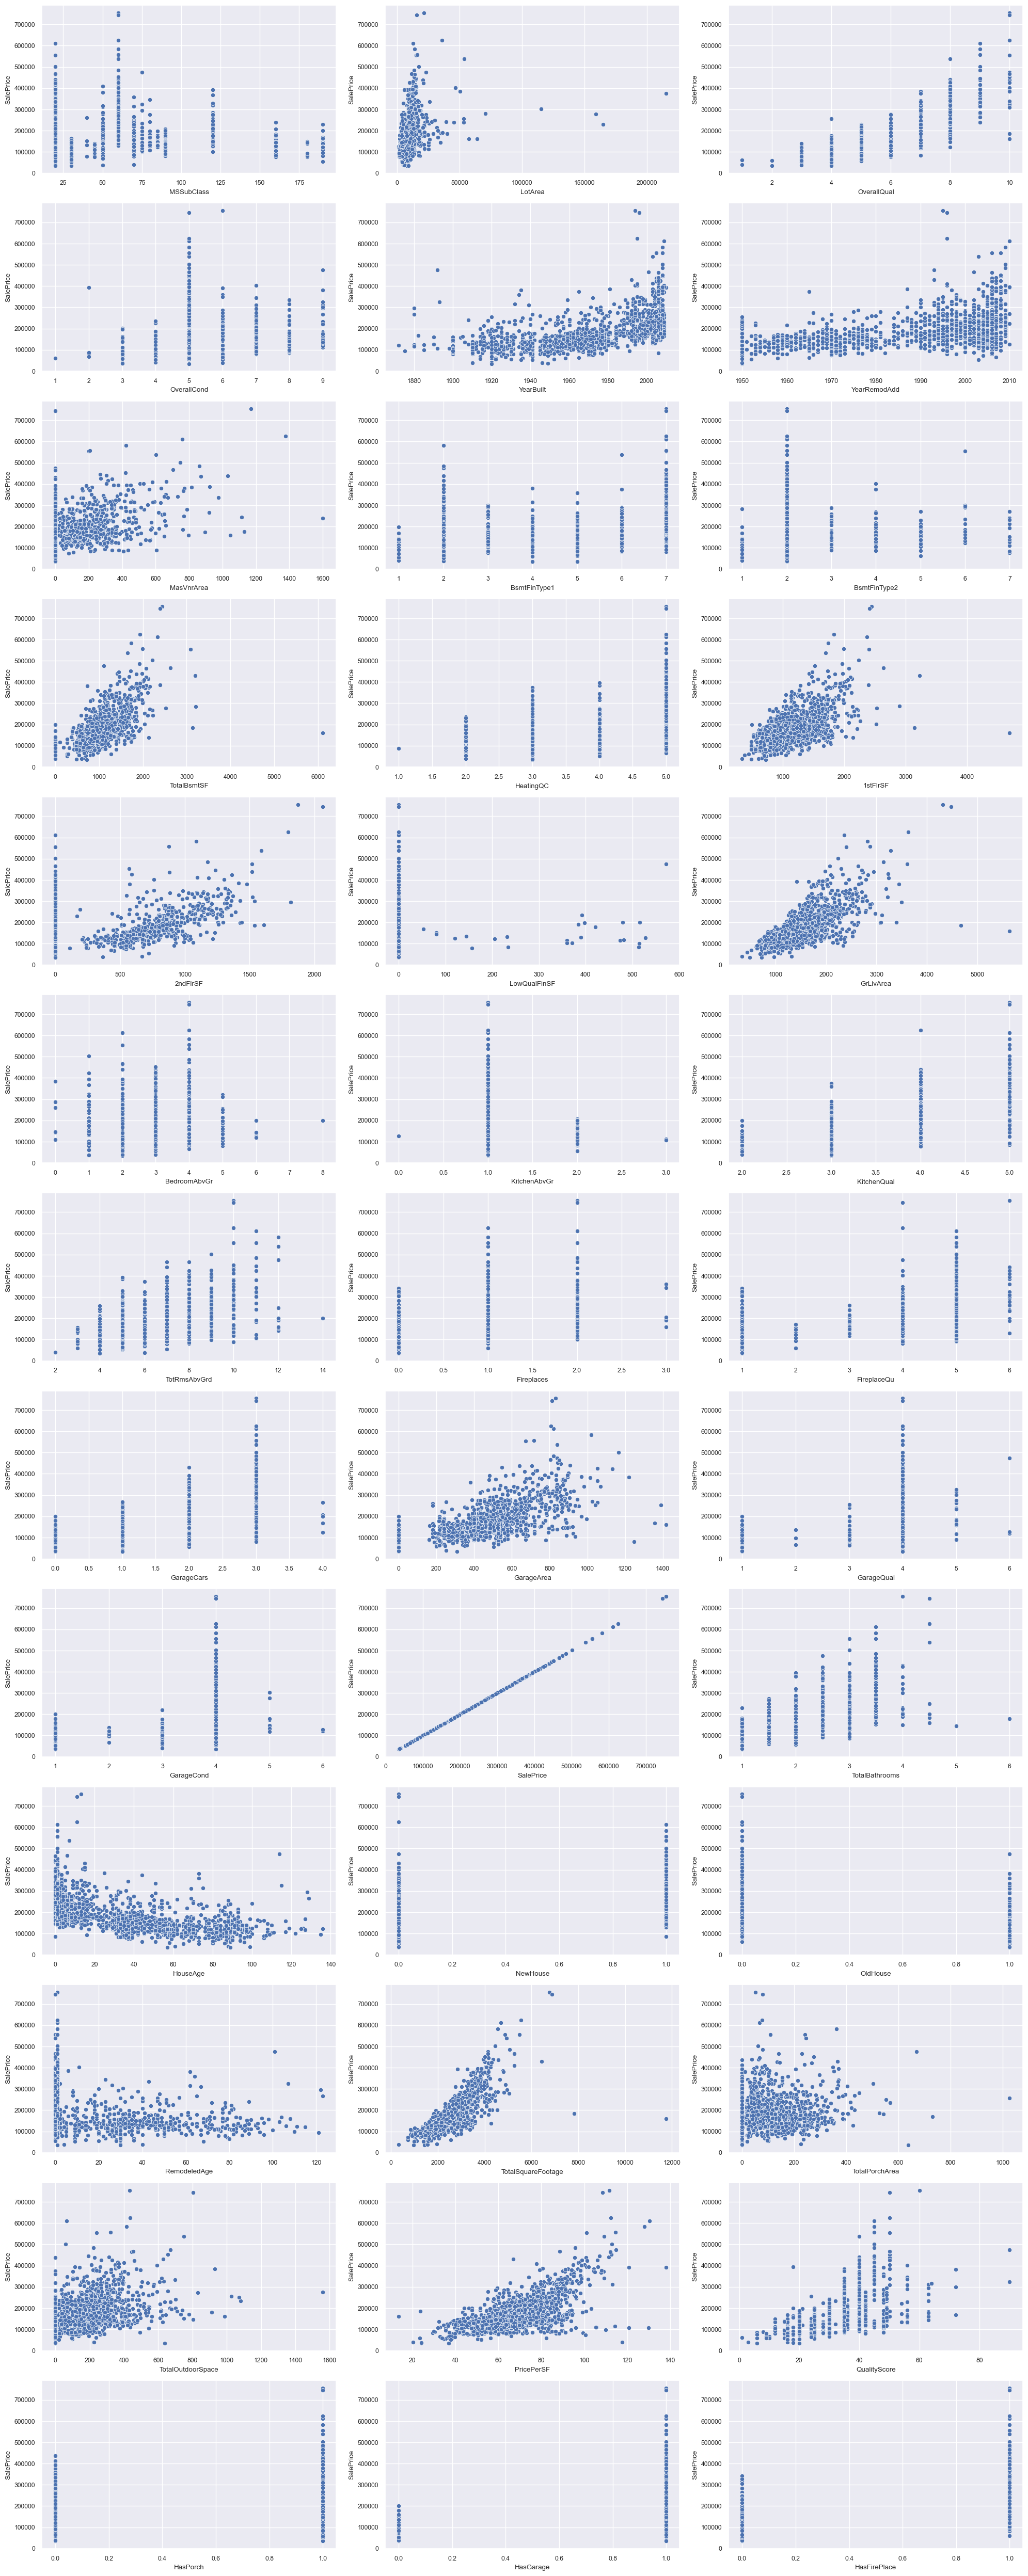

In [1893]:
get_scatter(useful_numerical_cols)

In [1894]:
def detect_outlier_iqr(df, columns):
    outliers = {}
    for each in columns:
        Q1 = df[each].quantile(0.25)
        Q3 = df[each].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[each] = df[(df[each] < lower_bound) | (df[each] > upper_bound)][[each, 'SalePrice']]
    return outliers


In [1895]:
numerical_columns = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                     'MasVnrArea', 'TotalPorchArea', 'TotalOutdoorSpace', ]

## Let us look for outliers

Lets look them individually

#### LotArea

<Axes: xlabel='LotArea', ylabel='SalePrice'>

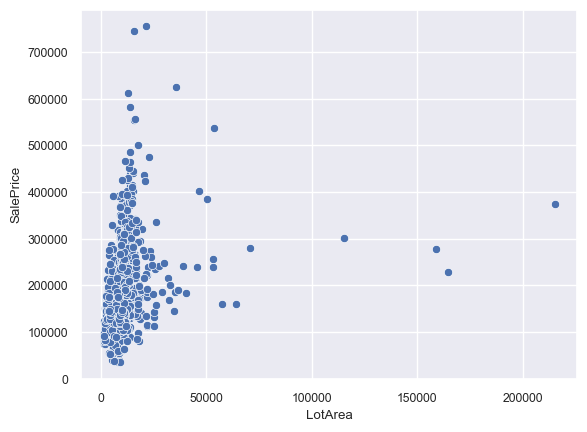

In [1896]:
sns.scatterplot(df, x='LotArea', y='SalePrice')

<Axes: xlabel='LotArea'>

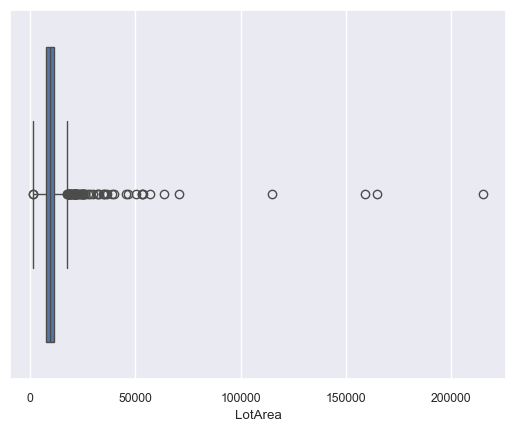

In [1897]:
sns.boxplot(df, x="LotArea")

In [1898]:
np.mean(df['LotArea'])

10516.828082191782

In [1899]:
np.median(df['LotArea'])

9478.5

The IQR is small, suggesting a lot of values are concentrated around a single point. We can see few points extremely to the right i.e above 50000. THe dataset is highly skewed. Let, us investigate more, is this due to error or not?

If error, we will drop these columns.
If it is not, we will log transform it to bring it closer to normal distribution.

In [1900]:
df[df['LotArea'] > 40000][['LotArea', 'SalePrice']]

,LotArea,SalePrice
Id,,
54,50271,385000
250,159000,277000
314,215245,375000
336,164660,228950
385,53107,240000
452,70761,280000
458,53227,256000
524,40094,184750
662,46589,402000


In [1901]:
df.drop(df[df['LotArea'] > 40000].index, inplace=True)

#### Overall Quality

In [1902]:
df.select_dtypes(np.number).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SalePrice', 'TotalBathrooms', 'HouseAge',
       'NewHouse', 'OldHouse', 'RemodeledAge', 'TotalSquareFootage',
       'TotalPorchArea', 'TotalOutdoorSpace', 'PricePerSF', 'QualityScore',
       'HasPorch', 'HasGarage', 'HasFirePlace', 'NeighborhoodMedianPrices',
       'LotShapeScore', 'LandContourScore', 'LandSlopeScore',
       'ExternalQualityScore', 'ExternalCondScore', 'BsmtQaulityScore',
       'BsmtConditionScore'],
      dtype='object')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

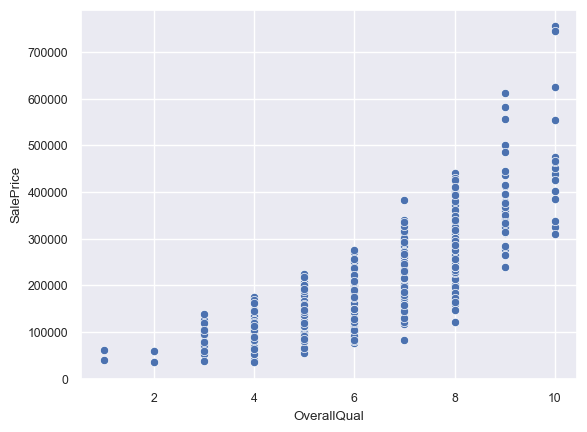

In [1903]:
sns.scatterplot(df, x='OverallQual', y='SalePrice')

In [1904]:
df[(df['OverallQual'] >= 9) & (df['SalePrice'] > 500000)][['SalePrice', 'NeighborhoodMedianPrices']]

,SalePrice,NeighborhoodMedianPrices
Id,,
179,501837,278000.0
441,555000,315000.0
692,755000,301500.0
804,582933,315000.0
899,611657,315000.0
1047,556581,278000.0
1170,625000,301500.0
1183,745000,301500.0


In [1905]:
df.drop(df[(df['OverallQual'] >= 9) & (df['SalePrice'] > 500000)].index, inplace=True)

#### Overall Condition

In [1906]:
df[(df['OverallCond'] == 5) & (df['SalePrice'] > 500000)][['SalePrice','NeighborhoodMedianPrices']]

,SalePrice,NeighborhoodMedianPrices
Id,,


yeah these are outliers

In [1907]:
df.drop(df[(df['OverallCond'] == 5) & (df['SalePrice'] > 500000)].index, inplace=True)

#### MasVnr Area

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

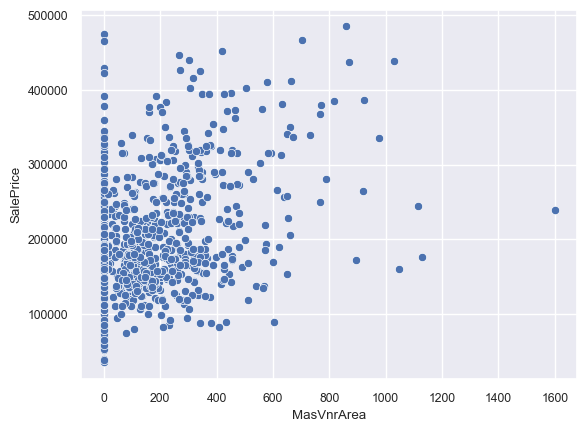

In [1908]:
sns.scatterplot(df, x='MasVnrArea', y='SalePrice')

In [1909]:
df[(df['MasVnrArea'] < 1000) & (df['SalePrice'] > 450000)][['SalePrice', 'OverallQual', 'TotalSquareFootage', 'YearBuilt' ,'NeighborhoodMedianPrices']]

,SalePrice,OverallQual,TotalSquareFootage,YearBuilt,NeighborhoodMedianPrices
Id,,,,,
186,475000,10,4143,1892,119000.0
592,451950,10,4018,2008,315000.0
799,485000,9,5066,2008,315000.0
1244,465000,10,4152,2006,315000.0
1374,466500,10,5266,2001,301500.0


Looks like 186 is an outlier.

In [1910]:
df.drop(index=186, inplace=True)

#### Total Square Footage

<Axes: xlabel='TotalSquareFootage', ylabel='SalePrice'>

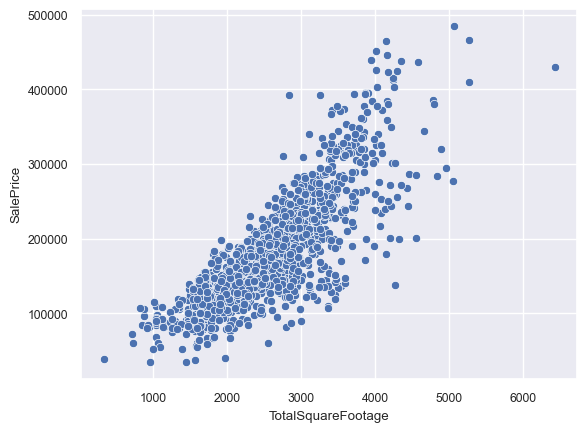

In [1911]:
sns.scatterplot(df, x='TotalSquareFootage', y='SalePrice')

## I think we have dealt with most of our outliers.

# Feature Selection

Let us look into correlation matrix again.

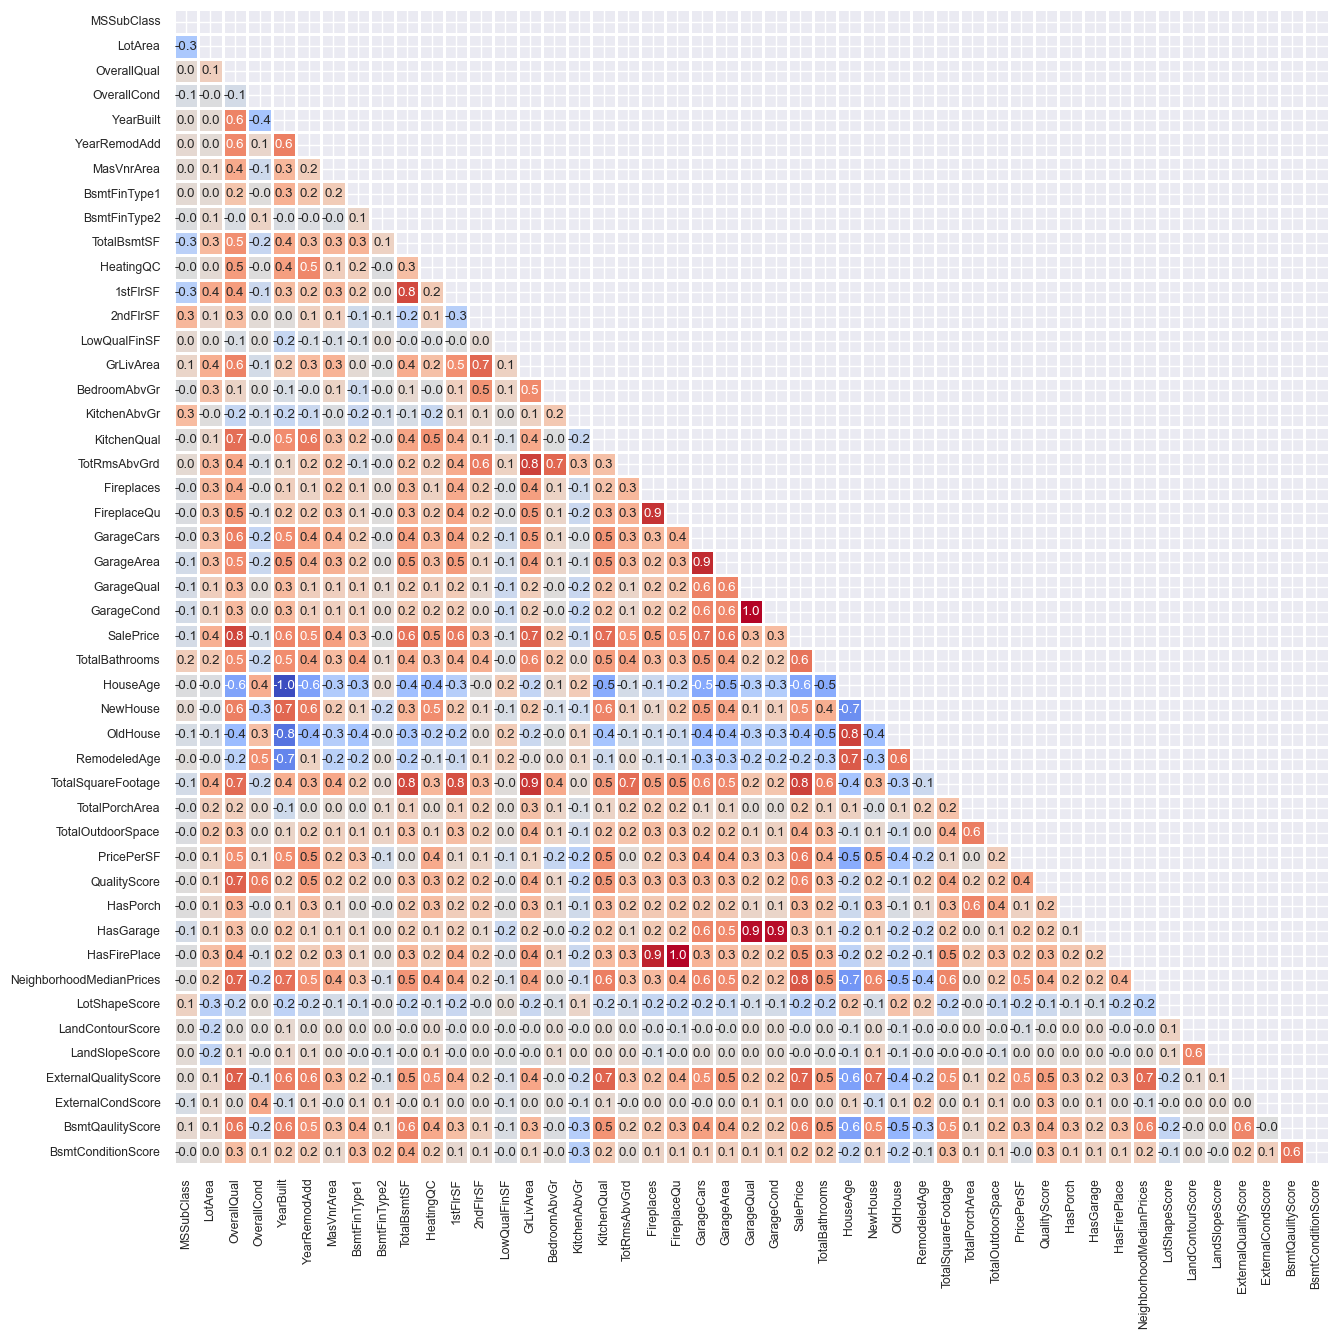

In [1912]:
sns.set(font_scale=0.8)
correlation_df = df.select_dtypes(np.number).corr()
mask = np.triu(correlation_df.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_df,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            mask=mask,
            square=True,
            linewidths=1,
            cbar=False)

plt.show()

In [1913]:
correlation_df['SalePrice']

MSSubClass                 -0.084837
LotArea                     0.351597
OverallQual                 0.810950
OverallCond                -0.085531
YearBuilt                   0.564672
YearRemodAdd                0.539876
MasVnrArea                  0.448962
BsmtFinType1                0.309046
BsmtFinType2               -0.018843
TotalBsmtSF                 0.633315
HeatingQC                   0.452180
1stFlrSF                    0.611973
2ndFlrSF                    0.293664
LowQualFinSF               -0.059610
GrLivArea                   0.710831
BedroomAbvGr                0.171132
KitchenAbvGr               -0.142486
KitchenQual                 0.670752
TotRmsAbvGrd                0.516364
Fireplaces                  0.464372
FireplaceQu                 0.537229
GarageCars                  0.655072
GarageArea                  0.640148
GarageQual                  0.289533
GarageCond                  0.283503
SalePrice                   1.000000
TotalBathrooms              0.637658
H

Let us drop features with correlation less than  abs(0.10)

In [1914]:
correlated_cols = correlation_df[np.abs(correlation_df['SalePrice']) > 0.20].T.columns

In [1915]:
correlated_cols

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SalePrice',
       'TotalBathrooms', 'HouseAge', 'NewHouse', 'OldHouse', 'RemodeledAge',
       'TotalSquareFootage', 'TotalOutdoorSpace', 'PricePerSF', 'QualityScore',
       'HasPorch', 'HasGarage', 'HasFirePlace', 'NeighborhoodMedianPrices',
       'LotShapeScore', 'ExternalQualityScore', 'BsmtQaulityScore',
       'BsmtConditionScore'],
      dtype='object')

#### Selecting Continuous Values only for skewness and logtransformation

In [1916]:
df_conti = df[['LotArea', 'PricePerSF', 'TotalSquareFootage','TotalOutdoorSpace','TotalBsmtSF','GarageArea', 'NeighborhoodMedianPrices','1stFlrSF', 'QualityScore' ,'2ndFlrSF',  'GrLivArea', 'SalePrice','HouseAge', 'RemodeledAge' ]]

In [1917]:
df_conti

,LotArea,PricePerSF,TotalSquareFootage,TotalOutdoorSpace,TotalBsmtSF,GarageArea,NeighborhoodMedianPrices,1stFlrSF,QualityScore,2ndFlrSF,GrLivArea,SalePrice,HouseAge,RemodeledAge
Id,,,,,,,,,,,,,,
1,8450,81.254871,2566,61,856,548,197200.0,856,35,854,1710,208500,5,0
2,9600,71.909667,2524,298,1262,460,218000.0,1262,48,0,1262,181500,31,0
3,11250,82.594235,2706,42,920,608,197200.0,920,35,866,1786,223500,7,1
4,9550,56.611403,2473,307,756,642,200624.0,961,35,756,1717,140000,91,55
5,14260,74.783129,3343,276,1145,836,301500.0,1145,40,1053,2198,250000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,67.307692,2600,40,953,460,181000.0,953,30,694,1647,175000,8,1
1457,13175,58.091286,3615,349,1542,500,182900.0,2073,36,0,2073,210000,32,10
1458,9042,76.317297,3492,60,1152,252,200624.0,1188,63,1152,2340,266500,69,65


In [1918]:
skewness = df_conti.skew().sort_values(ascending=False)

In [1919]:
skewness

RemodeledAge                1.952560
LotArea                     1.654375
TotalOutdoorSpace           1.586803
SalePrice                   1.199546
NeighborhoodMedianPrices    1.044451
1stFlrSF                    0.872437
GrLivArea                   0.774446
2ndFlrSF                    0.761487
HouseAge                    0.598418
TotalSquareFootage          0.569223
TotalBsmtSF                 0.410710
QualityScore                0.307022
PricePerSF                  0.128049
GarageArea                  0.118999
dtype: float64

In [1920]:
skewed_features  = skewness > 0.3

Lets log transform these features

In [1921]:
for feature in skewed_features.index:
    df[feature] = np.log1p(df[feature])

In [1922]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice,TotalBathrooms,HouseAge,NewHouse,OldHouse,RemodeledAge,TotalSquareFootage,TotalPorchArea,TotalOutdoorSpace,PricePerSF,QualityScore,HasPorch,HasGarage,HasFirePlace,SeasonOfSale,NeighborhoodMedianPrices,CloseProximityToRoad,LotShapeScore,LandContourScore,LandSlopeScore,ExternalQualityScore,ExternalCondScore,BsmtQaulityScore,BsmtConditionScore
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,9.042040,Inside,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,No,7,2,6.753438,GasA,5,Y,SBrkr,6.753438,6.751101,0,7.444833,3,1,4,8,Typ,0,1,Attchd,RFn,2,6.308098,4,4,Y,No Fence,WD,Normal,12.247699,3.5,1.791759,1,0,0.000000,7.850493,61,4.127134,4.409823,3.583519,1,1,0,winter,12.191979,False,3,3,2,4,3,5,4
2,20,RL,80.0,9.169623,FR2,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Vnr,0.0,CBlock,Gd,6,2,7.141245,GasA,5,Y,SBrkr,7.141245,0.000000,0,7.141245,3,1,3,6,Typ,1,4,Attchd,RFn,2,6.133398,4,4,Y,No Fence,WD,Normal,12.109016,2.5,3.465736,0,0,0.000000,7.833996,0,5.700444,4.289221,3.891820,0,1,1,spring,12.292255,True,3,3,2,3,3,5,4
3,60,RL,68.0,9.328212,Inside,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,Mn,7,2,6.825460,GasA,5,Y,SBrkr,6.825460,6.765039,0,7.488294,3,1,4,6,Typ,1,4,Attchd,RFn,2,6.411818,4,4,Y,No Fence,WD,Normal,12.317171,3.5,2.079442,1,0,0.693147,7.903596,42,3.761200,4.425975,3.583519,1,1,1,summer,12.191979,False,0,3,2,4,3,5,4
4,70,RL,60.0,9.164401,Corner,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Vnr,0.0,BrkTil,No,6,2,6.629363,GasA,4,Y,SBrkr,6.869014,6.629363,0,7.448916,3,1,4,7,Typ,1,5,Detchd,Unf,3,6.466145,4,4,Y,No Fence,WD,Abnorml,11.849405,2.0,4.521789,0,1,4.025352,7.813592,307,5.730100,4.053721,3.583519,1,1,1,winter,12.209193,False,0,3,2,3,3,4,5
5,60,RL,84.0,9.565284,FR2,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,Av,7,2,7.044033,GasA,5,Y,SBrkr,7.044033,6.960348,0,7.695758,4,1,4,9,Typ,1,4,Attchd,RFn,3,6.729824,4,4,Y,No Fence,WD,Normal,12.429220,3.5,2.197225,1,0,0.000000,8.114923,84,5.624018,4.327876,3.713572,1,1,1,winter,12.616529,False,0,3,2,4,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,8.976894,Inside,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,No Vnr,0.0,PConc,No,2,2,6.860664,GasA,5,Y,SBrkr,6.860664,6.543912,0,7.407318,3,1,3,7,Typ,1,4,Attchd,RFn,2,6.133398,4,4,Y,No Fence,WD,Normal,12.072547,2.5,2.197225,1,0,0.693147,7.863651,40,3.713572,4.224022,3.433987,1,1,1,autumn,12.106258,False,3,3,2,3,3,5,4
1457,20,RL,85.0,9.486152,Inside,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,CBlock,No,6,4,7.341484,GasA,3,Y,SBrkr,7.637234,0.000000,0,7.637234,3,1,3,7,Min1,2,4,Attchd,Unf,2,6.216606,4,4,Y,MnPrv,WD,Normal,12.254868,3.0,3.496508,0,0,2.397895,8.193124,0,5.857933,4.079083,3.610918,0,1,1,winter,12.116700,False,3,3,2,3,3,5,4
1458,70,RL,66.0,9.109746,Inside,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,No Vnr,0.0,Stone,No,7,2,7.050123,GasA,5,Y,SBrkr,7.080868,7.050123,0,7.758333,4,1,4,9,Typ,2,5,Attchd,RFn,1,5.533389,4,4,Y,GdPrv,WD,Normal,12.493133,2.0,4.248495,0,1,4.189655,8.158516,60,4.110874,4.347918,4.158883,1,1,1,spring,12.209193,False,3,3,2,5,4,4,5


In [1923]:
df_cate = df.select_dtypes(np.object_)

In [1924]:
df_corr = df[correlated_cols]

In [1925]:
df_corr

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice,TotalBathrooms,HouseAge,NewHouse,OldHouse,RemodeledAge,TotalSquareFootage,TotalOutdoorSpace,PricePerSF,QualityScore,HasPorch,HasGarage,HasFirePlace,NeighborhoodMedianPrices,LotShapeScore,ExternalQualityScore,BsmtQaulityScore,BsmtConditionScore
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9.042040,7,2003,2003,196.0,7,6.753438,5,6.753438,6.751101,7.444833,4,8,0,1,2,6.308098,4,4,12.247699,3.5,1.791759,1,0,0.000000,7.850493,4.127134,4.409823,3.583519,1,1,0,12.191979,3,4,5,4
2,9.169623,6,1976,1976,0.0,6,7.141245,5,7.141245,0.000000,7.141245,3,6,1,4,2,6.133398,4,4,12.109016,2.5,3.465736,0,0,0.000000,7.833996,5.700444,4.289221,3.891820,0,1,1,12.292255,3,3,5,4
3,9.328212,7,2001,2002,162.0,7,6.825460,5,6.825460,6.765039,7.488294,4,6,1,4,2,6.411818,4,4,12.317171,3.5,2.079442,1,0,0.693147,7.903596,3.761200,4.425975,3.583519,1,1,1,12.191979,0,4,5,4
4,9.164401,7,1915,1970,0.0,6,6.629363,4,6.869014,6.629363,7.448916,4,7,1,5,3,6.466145,4,4,11.849405,2.0,4.521789,0,1,4.025352,7.813592,5.730100,4.053721,3.583519,1,1,1,12.209193,0,3,4,5
5,9.565284,8,2000,2000,350.0,7,7.044033,5,7.044033,6.960348,7.695758,4,9,1,4,3,6.729824,4,4,12.429220,3.5,2.197225,1,0,0.000000,8.114923,5.624018,4.327876,3.713572,1,1,1,12.616529,0,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,8.976894,6,1999,2000,0.0,2,6.860664,5,6.860664,6.543912,7.407318,3,7,1,4,2,6.133398,4,4,12.072547,2.5,2.197225,1,0,0.693147,7.863651,3.713572,4.224022,3.433987,1,1,1,12.106258,3,3,5,4
1457,9.486152,6,1978,1988,119.0,6,7.341484,3,7.637234,0.000000,7.637234,3,7,2,4,2,6.216606,4,4,12.254868,3.0,3.496508,0,0,2.397895,8.193124,5.857933,4.079083,3.610918,0,1,1,12.116700,3,3,5,4
1458,9.109746,7,1941,2006,0.0,7,7.050123,5,7.080868,7.050123,7.758333,4,9,2,5,1,5.533389,4,4,12.493133,2.0,4.248495,0,1,4.189655,8.158516,4.110874,4.347918,4.158883,1,1,1,12.209193,3,5,4,5


In [1926]:
df_cate

,MSZoning,LotFrontage,LotConfig,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,SaleType,SaleCondition,SeasonOfSale
Id,,,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,Inside,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,winter
2,RL,80.0,FR2,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,No Vnr,CBlock,Gd,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,spring
3,RL,68.0,Inside,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,summer
4,RL,60.0,Corner,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,No Vnr,BrkTil,No,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,No Fence,WD,Abnorml,winter
5,RL,84.0,FR2,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,62.0,Inside,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,No Vnr,PConc,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,autumn
1457,RL,85.0,Inside,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,No,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,WD,Normal,winter
1458,RL,66.0,Inside,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,No Vnr,Stone,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,WD,Normal,spring


In [1927]:
df_transformed = pd.concat([df_corr, df_cate], axis=1).reset_index()

In [1928]:
df_transformed.drop(columns=['Id', 'YearBuilt', 'YearRemodAdd', 'LotFrontage'], inplace=True)

In [1929]:
df_transformed

,LotArea,OverallQual,MasVnrArea,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice,TotalBathrooms,HouseAge,NewHouse,OldHouse,RemodeledAge,TotalSquareFootage,TotalOutdoorSpace,PricePerSF,QualityScore,HasPorch,HasGarage,HasFirePlace,NeighborhoodMedianPrices,LotShapeScore,ExternalQualityScore,BsmtQaulityScore,BsmtConditionScore,MSZoning,LotConfig,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,SaleType,SaleCondition,SeasonOfSale
0,9.042040,7,196.0,7,6.753438,5,6.753438,6.751101,7.444833,4,8,0,1,2,6.308098,4,4,12.247699,3.5,1.791759,1,0,0.000000,7.850493,4.127134,4.409823,3.583519,1,1,0,12.191979,3,4,5,4,RL,Inside,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,winter
1,9.169623,6,0.0,6,7.141245,5,7.141245,0.000000,7.141245,3,6,1,4,2,6.133398,4,4,12.109016,2.5,3.465736,0,0,0.000000,7.833996,5.700444,4.289221,3.891820,0,1,1,12.292255,3,3,5,4,RL,FR2,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,No Vnr,CBlock,Gd,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,spring
2,9.328212,7,162.0,7,6.825460,5,6.825460,6.765039,7.488294,4,6,1,4,2,6.411818,4,4,12.317171,3.5,2.079442,1,0,0.693147,7.903596,3.761200,4.425975,3.583519,1,1,1,12.191979,0,4,5,4,RL,Inside,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,summer
3,9.164401,7,0.0,6,6.629363,4,6.869014,6.629363,7.448916,4,7,1,5,3,6.466145,4,4,11.849405,2.0,4.521789,0,1,4.025352,7.813592,5.730100,4.053721,3.583519,1,1,1,12.209193,0,3,4,5,RL,Corner,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,No Vnr,BrkTil,No,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,No Fence,WD,Abnorml,winter
4,9.565284,8,350.0,7,7.044033,5,7.044033,6.960348,7.695758,4,9,1,4,3,6.729824,4,4,12.429220,3.5,2.197225,1,0,0.000000,8.114923,5.624018,4.327876,3.713572,1,1,1,12.616529,0,4,5,4,RL,FR2,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,8.976894,6,0.0,2,6.860664,5,6.860664,6.543912,7.407318,3,7,1,4,2,6.133398,4,4,12.072547,2.5,2.197225,1,0,0.693147,7.863651,3.713572,4.224022,3.433987,1,1,1,12.106258,3,3,5,4,RL,Inside,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,No Vnr,PConc,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,autumn
1433,9.486152,6,119.0,6,7.341484,3,7.637234,0.000000,7.637234,3,7,2,4,2,6.216606,4,4,12.254868,3.0,3.496508,0,0,2.397895,8.193124,5.857933,4.079083,3.610918,0,1,1,12.116700,3,3,5,4,RL,Inside,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,No,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,WD,Normal,winter
1434,9.109746,7,0.0,7,7.050123,5,7.080868,7.050123,7.758333,4,9,2,5,1,5.533389,4,4,12.493133,2.0,4.248495,0,1,4.189655,8.158516,4.110874,4.347918,4.158883,1,1,1,12.209193,3,5,4,5,RL,Inside,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,No Vnr,Stone,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,WD,Normal,spring
1435,9.181735,5,0.0,7,6.983790,4,6.983790,0.000000,6.983790,4,5,0,1,1,5.484797,4,4,11.864469,2.0,4.110874,0,1,3.850148,7.676474,6.171701,4.203508,3.433987,1,1,0,11.849405,3,3,4,4,RL,Inside,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,No Vnr,CBlock,Mn,GasA,Y,FuseA,Typ,Attchd,Unf,Y,No Fence,WD,Normal,spring


<Axes: xlabel='MasVnrArea', ylabel='Count'>

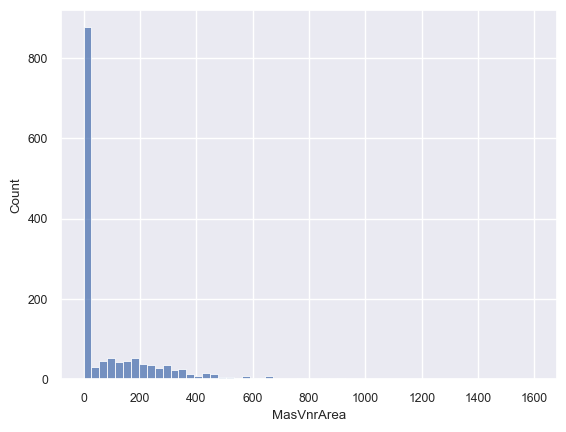

In [1930]:
sns.histplot(df_transformed, x='MasVnrArea')

has lots of zero values. Using boxcox transformation

In [1931]:
from  scipy.stats import boxcox

In [1932]:
df_transformed['MasVnrArea'], _ = boxcox(df_transformed['MasVnrArea'] + 1) 

In [1933]:
df_transformed

,LotArea,OverallQual,MasVnrArea,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice,TotalBathrooms,HouseAge,NewHouse,OldHouse,RemodeledAge,TotalSquareFootage,TotalOutdoorSpace,PricePerSF,QualityScore,HasPorch,HasGarage,HasFirePlace,NeighborhoodMedianPrices,LotShapeScore,ExternalQualityScore,BsmtQaulityScore,BsmtConditionScore,MSZoning,LotConfig,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,SaleType,SaleCondition,SeasonOfSale
0,9.042040,7,2.927405,7,6.753438,5,6.753438,6.751101,7.444833,4,8,0,1,2,6.308098,4,4,12.247699,3.5,1.791759,1,0,0.000000,7.850493,4.127134,4.409823,3.583519,1,1,0,12.191979,3,4,5,4,RL,Inside,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,winter
1,9.169623,6,0.000000,6,7.141245,5,7.141245,0.000000,7.141245,3,6,1,4,2,6.133398,4,4,12.109016,2.5,3.465736,0,0,0.000000,7.833996,5.700444,4.289221,3.891820,0,1,1,12.292255,3,3,5,4,RL,FR2,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,No Vnr,CBlock,Gd,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,spring
2,9.328212,7,2.875836,7,6.825460,5,6.825460,6.765039,7.488294,4,6,1,4,2,6.411818,4,4,12.317171,3.5,2.079442,1,0,0.693147,7.903596,3.761200,4.425975,3.583519,1,1,1,12.191979,0,4,5,4,RL,Inside,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,summer
3,9.164401,7,0.000000,6,6.629363,4,6.869014,6.629363,7.448916,4,7,1,5,3,6.466145,4,4,11.849405,2.0,4.521789,0,1,4.025352,7.813592,5.730100,4.053721,3.583519,1,1,1,12.209193,0,3,4,5,RL,Corner,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,No Vnr,BrkTil,No,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,No Fence,WD,Abnorml,winter
4,9.565284,8,3.070317,7,7.044033,5,7.044033,6.960348,7.695758,4,9,1,4,3,6.729824,4,4,12.429220,3.5,2.197225,1,0,0.000000,8.114923,5.624018,4.327876,3.713572,1,1,1,12.616529,0,4,5,4,RL,FR2,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,8.976894,6,0.000000,2,6.860664,5,6.860664,6.543912,7.407318,3,7,1,4,2,6.133398,4,4,12.072547,2.5,2.197225,1,0,0.693147,7.863651,3.713572,4.224022,3.433987,1,1,1,12.106258,3,3,5,4,RL,Inside,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,No Vnr,PConc,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No Fence,WD,Normal,autumn
1433,9.486152,6,2.787112,6,7.341484,3,7.637234,0.000000,7.637234,3,7,2,4,2,6.216606,4,4,12.254868,3.0,3.496508,0,0,2.397895,8.193124,5.857933,4.079083,3.610918,0,1,1,12.116700,3,3,5,4,RL,Inside,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,No,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,WD,Normal,winter
1434,9.109746,7,0.000000,7,7.050123,5,7.080868,7.050123,7.758333,4,9,2,5,1,5.533389,4,4,12.493133,2.0,4.248495,0,1,4.189655,8.158516,4.110874,4.347918,4.158883,1,1,1,12.209193,3,5,4,5,RL,Inside,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,No Vnr,Stone,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,WD,Normal,spring
1435,9.181735,5,0.000000,7,6.983790,4,6.983790,0.000000,6.983790,4,5,0,1,1,5.484797,4,4,11.864469,2.0,4.110874,0,1,3.850148,7.676474,6.171701,4.203508,3.433987,1,1,0,11.849405,3,3,4,4,RL,Inside,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,No Vnr,CBlock,Mn,GasA,Y,FuseA,Typ,Attchd,Unf,Y,No Fence,WD,Normal,spring


In [1935]:
df_transformed.to_csv('./transformed_datset')

In [ ]:
0   MSSubClass                1437 non-null   int64  
 1   MSZoning                  1437 non-null   object 
 2   LotFrontage               1437 non-null   float64
 3   LotArea                   1437 non-null   float64
 4   Street                    1437 non-null   object 
 5   Alley                     1437 non-null   object 
 6   LotShape                  1437 non-null   int64  
 7   LandContour               1437 non-null   int64  
 8   LotConfig                 1437 non-null   object 
 9   LandSlope                 1437 non-null   int64  
 10  Condition1                1437 non-null   object 
 11  Condition2                1437 non-null   object 
 12  BldgType                  1437 non-null   object 
 13  HouseStyle                1437 non-null   object 
 14  OverallQual               1437 non-null   int64  
 15  OverallCond               1437 non-null   int64  
 16  RoofStyle                 1437 non-null   object 
 17  RoofMatl                  1437 non-null   object 
 18  Exterior1st               1437 non-null   object 
 19  Exterior2nd               1437 non-null   object 
 20  MasVnrType                1437 non-null   object 
 21  MasVnrArea                1437 non-null   float64
 22  ExterQual                 1437 non-null   int64  
 23  ExterCond                 1437 non-null   int64  
 24  Foundation                1437 non-null   object 
 25  BsmtQual                  1437 non-null   int64  
 26  BsmtCond                  1437 non-null   int64  
 27  BsmtExposure              1437 non-null   object 
 28  BsmtFinType1              1437 non-null   int64  
 29  BsmtFinType2              1437 non-null   int64  
 30  TotalBsmtSF               1437 non-null   float64
 31  Heating                   1437 non-null   object 
 32  HeatingQC                 1437 non-null   int64  
 33  CentralAir                1437 non-null   object 
 34  Electrical                1437 non-null   object 
 35  1stFlrSF                  1437 non-null   float64
 36  2ndFlrSF                  1437 non-null   float64
 37  LowQualFinSF              1437 non-null   int64  
 38  GrLivArea                 1437 non-null   float64
 39  BedroomAbvGr              1437 non-null   int64  
 40  KitchenAbvGr              1437 non-null   int64  
 41  KitchenQual               1437 non-null   int64  
 42  TotRmsAbvGrd              1437 non-null   int64  
 43  Functional                1437 non-null   object 
 44  Fireplaces                1437 non-null   int64  
 45  FireplaceQu               1437 non-null   int64  
 46  GarageType                1437 non-null   object 
 47  GarageFinish              1437 non-null   object 
 48  GarageArea                1437 non-null   float64
 49  GarageQual                1437 non-null   int64  
 50  GarageCond                1437 non-null   int64  
 51  PavedDrive                1437 non-null   object 
 52  Fence                     1437 non-null   object 
 53  SaleType                  1437 non-null   object 
 54  SaleCondition             1437 non-null   object 
 55  SalePrice                 1437 non-null   float64
 56  TotalBathrooms            1437 non-null   float64
 57  HouseAge                  1437 non-null   float64
 58  RemodeledAge              1437 non-null   float64
 59  TotalSquareFootage        1437 non-null   float64
 60  TotalPorchArea            1437 non-null   int64  
 61  TotalOutdoorSpace         1437 non-null   float64
 62  PricePerSF                1437 non-null   float64
 63  QualityScore              1437 non-null   float64
 64  HasPorch                  1437 non-null   int64  
 65  HasGarage                 1437 non-null   int64  
 66  HasFirePlace              1437 non-null   int64  
 67  NewHouse                  1437 non-null   int64  
 68  OldHouse                  1437 non-null   int64  
 69  NeighborhoodMedianPrices  1437 non-null   float64
 70  SeasonOfSale              1437 non-null   object 